# Numpy Exercise 4

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Complete graph Laplacian

In discrete mathematics a [Graph](http://en.wikipedia.org/wiki/Graph_%28mathematics%29) is a set of *vertices* or *nodes* that are connected to each other by *edges* or *lines*. If those *edges* don't have directionality, the graph is said to be *undirected*. Graphs are used to model social and communications networks (Twitter, Facebook, Internet) as well as natural systems such as molecules.

A [Complete Graph](http://en.wikipedia.org/wiki/Complete_graph), $K_n$ on $n$ nodes has an edge that connects each node to every other node.

Here is $K_5$:

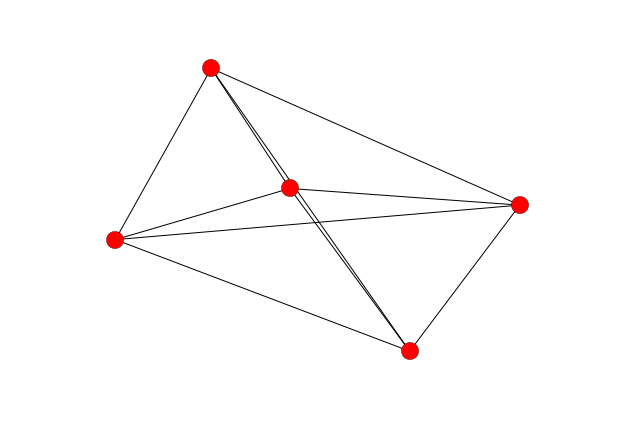

In [2]:
import networkx as nx
K_5=nx.complete_graph(5)
nx.draw(K_5)

The [Laplacian Matrix](http://en.wikipedia.org/wiki/Laplacian_matrix) is a matrix that is extremely important in graph theory and numerical analysis. It is defined as $L=D-A$. Where $D$ is the degree matrix and $A$ is the adjecency matrix. For the purpose of this problem you don't need to understand the details of these matrices, although their definitions are relatively simple.

The degree matrix for $K_n$ is an $n \times n$ diagonal matrix with the value $n-1$ along the diagonal and zeros everywhere else. Write a function to compute the degree matrix for $K_n$ using NumPy.

In [3]:
def complete_deg(n):
    """Return the integer valued degree matrix D for the complete graph K_n."""
    a = np.ones((n,n), dtype=np.int)
    b = (n-1)*a
    diagonal_matrix = np.diag(np.diag(b))
    return diagonal_matrix

In [4]:
print complete_deg(5)

[[4 0 0 0 0]
 [0 4 0 0 0]
 [0 0 4 0 0]
 [0 0 0 4 0]
 [0 0 0 0 4]]


In [5]:
D = complete_deg(5)
assert D.shape==(5,5)
assert D.dtype==np.dtype(int)
assert np.all(D.diagonal()==4*np.ones(5))
assert np.all(D-np.diag(D.diagonal())==np.zeros((5,5),dtype=int))

The adjacency matrix for $K_n$ is an $n \times n$ matrix with zeros along the diagonal and ones everywhere else. Write a function to compute the adjacency matrix for $K_n$ using NumPy.

In [6]:
def complete_adj(n):
    """Return the integer valued adjacency matrix A for the complete graph K_n."""
    a = np.ones((n,n), dtype=np.int)
    b = np.diag(np.diag(a))
    c = -1*a
    d = c + b
    adjacency_matrix = abs(d)
    return adjacency_matrix

In [7]:
A = complete_adj(5)
assert A.shape==(5,5)
assert A.dtype==np.dtype(int)
assert np.all(A+np.eye(5,dtype=int)==np.ones((5,5),dtype=int))

Use NumPy to explore the eigenvalues or *spectrum* of the Laplacian *L* of $K_n$. What patterns do you notice as $n$ changes? Create a *conjecture* about the general Laplace *spectrum* of $K_n$.

In [8]:
def eig_vals(m):
    L = complete_deg(m) - complete_adj(m)
    return np.linalg.eigvals(L)

In [9]:
print eig_vals(2)
print 
print eig_vals(3)
print
print eig_vals(4)
print
print eig_vals(5)
print
print eig_vals(6)
print
print eig_vals(7)
print
print eig_vals(25)

[ 2.  0.]

[  3.00000000e+00  -4.44089210e-16   3.00000000e+00]

[  4.00000000e+00  -1.11022302e-16   4.00000000e+00   4.00000000e+00]

[ 5.  0.  5.  5.  5.]

[  6.00000000e+00  -6.66133815e-16   6.00000000e+00   6.00000000e+00
   6.00000000e+00   6.00000000e+00]

[  7.00000000e+00  -1.11022302e-15   7.00000000e+00   7.00000000e+00
   7.00000000e+00   7.00000000e+00   7.00000000e+00]

[  2.50000000e+01  -5.10702591e-15   2.50000000e+01   2.50000000e+01
   2.50000000e+01   2.50000000e+01   2.50000000e+01   2.50000000e+01
   2.50000000e+01   2.50000000e+01   2.50000000e+01   2.50000000e+01
   2.50000000e+01   2.50000000e+01   2.50000000e+01   2.50000000e+01
   2.50000000e+01   2.50000000e+01   2.50000000e+01   2.50000000e+01
   2.50000000e+01   2.50000000e+01   2.50000000e+01   2.50000000e+01
   2.50000000e+01]


As n changes, I notice that the number of eigenvalues matches the value of n, and that (n-1) of those eigenvalues seem to match the value of n.  The remaining eigenvalue is something completely different from n.

Therefore, I can reason that as n increases, the Laplace Spectrum of Sn also increases.